<a href="https://colab.research.google.com/github/Ranjith5720/Regression_Models/blob/main/Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Import Necessary Libraries :**

In [1]:
import numpy as np
import pandas as pd

#### **Data On - Boarding :**

In [2]:
# upload raw dataset

from google.colab import files
data = files.upload()

Saving House price.csv to House price.csv


In [3]:
# convert raw dataset to dataframe

df =  pd.read_csv('House price.csv')
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


#### **Data Preprocessing :**

In [4]:
# find total no. of rows & columns in the dataframe

df.shape

(29451, 12)

In [5]:
# find column names in the dataframe

df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [6]:
# find first five rows in the dataframe

df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [7]:
# find last five rows in the dataframe

df.tail()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0,1,2,BHK,896.774194,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


In [8]:
# find all informations about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [9]:
# find descriptive statistical analysis

df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [10]:
# find total no. of missing values in the dataframe

df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [11]:
# shallow copy of the dataframe

df_copy = df.copy()

In [12]:
# clear unwanted columns in the dataframe

df_copy = df_copy.drop(columns=['POSTED_BY','ADDRESS'])
df_copy

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0
29447,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0
29448,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0


#### **Data Encoding :**

In [13]:
# using label encoder method

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df_copy['BHK_OR_RK'] = le.fit_transform(df_copy['BHK_OR_RK'])
df_copy

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,0,2500.000000,1,1,27.140626,78.043277,45.0
29447,0,0,2,0,769.230769,1,1,39.945409,-86.150721,16.0
29448,0,0,2,0,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,0,2,0,927.079009,1,1,12.900150,80.227910,67.0


#### **X & Y Split :**

In [15]:
# separate the independent variable in the dataframe

x = df_copy.iloc[:,:-1]
x

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,0,0,2,0,1300.236407,1,1,12.969910,77.597960
1,0,0,2,0,1275.000000,1,1,12.274538,76.644605
2,0,0,2,0,933.159722,1,1,12.778033,77.632191
3,0,1,2,0,929.921143,1,1,28.642300,77.344500
4,1,0,2,0,999.009247,0,1,22.592200,88.484911
...,...,...,...,...,...,...,...,...,...
29446,0,0,3,0,2500.000000,1,1,27.140626,78.043277
29447,0,0,2,0,769.230769,1,1,39.945409,-86.150721
29448,0,0,2,0,1022.641509,1,1,26.928785,75.828002
29449,0,0,2,0,927.079009,1,1,12.900150,80.227910


In [16]:
# separate the dependent variable in the dataframe

y = df_copy.iloc[:,-1]
y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64

#### **Train & Test Split :**

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size= 0.3, random_state= 137 )

In [18]:
x_train.shape

(20615, 9)

In [19]:
x_test.shape

(8836, 9)

In [20]:
y_train.shape

(20615,)

In [21]:
y_test.shape

(8836,)

#### **Model Building :**

**Random Forest : ( RF - Regression )**  

- Random forest regression is a machine learning algorithm that can be used for both classification and regression tasks. It is an ensemble method that combines the predictions of multiple decision trees to make a final prediction.

Random forest regression can be used for a variety of tasks, including:

- Predicting the price of a house

- Predicting the sales of a product

- Predicting the risk of a disease

- Predicting the outcome of a sporting event

 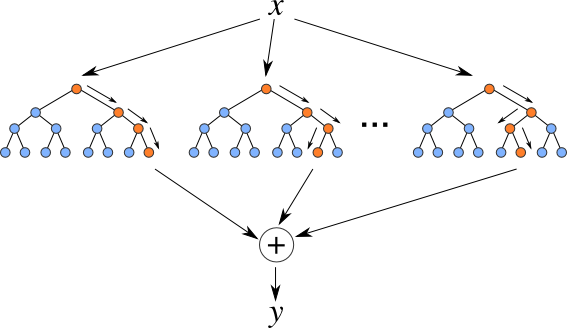

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [23]:
# train the model

rfr.fit(x_train, y_train)

RandomForestRegressor()

In [24]:
# predict the values

y_predict = rfr.predict(x_test)
y_predict

array([ 54.511,  33.371,  76.079, ...,  30.121,  46.926, 124.47 ])

#### **Model Evaluation :**

**Evaluation Metrics :**

- Metrics are the measures that evaluate the model we built in ML. Based on the metrics score and prediction accuracy, model is said to be well built or not.

- The point to be noted here is every metrics can not be applied for every other problem. Evaluation metrics help in fine tuning to optimize the performance of the model, which results in good prediction.

- The metrics not only deals with the good prediction rate but also the error rate.


**Metrics for Regression :**

Following metrics are used to evaluate the regressor problems :

1. R - Squared ( R^2 )
2. Mean Absolute Error ( MAE )
3. Mean Squared Error ( MSE )
4. Root Mean Squared Error ( RMSE )

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

In [26]:
# find r squared value

r2 = r2_score(y_test, y_predict)
r2

0.9488840909481655

In [27]:
# find mean absolute error

mae = mean_absolute_error(y_test, y_predict)
mae

31.795106700554175

In [28]:
# find mean squared error

mse = mean_squared_error(y_test, y_predict)
mse

17610.81221831741

In [29]:
# find log of mean squared error

lmse = mean_squared_log_error(y_test, y_predict)
lmse

0.14699498072123757

In [30]:
# find root mean squared error

rmse = np.sqrt(mse)
rmse

132.70573543866675